In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Zad1

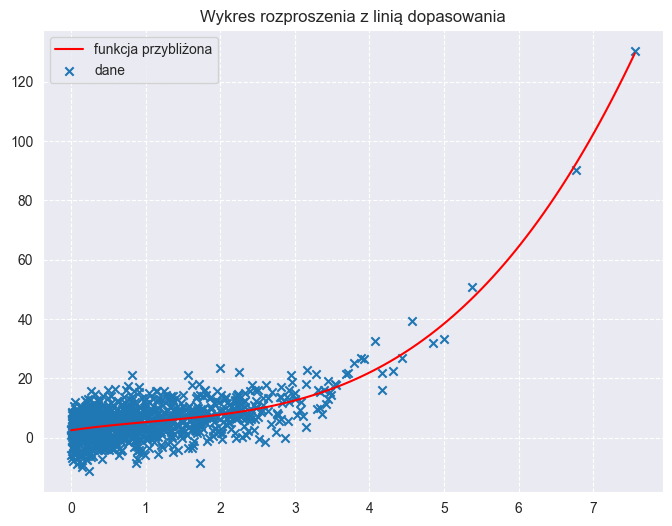

In [29]:
file_path = "dane\\zad1_lista1.txt"
data = np.loadtxt(file_path)

objasniajaca = data[:, 0] #x
objasniana = data[:, 1] #y

wsp = np.polyfit(objasniajaca, objasniana, deg=3)
base = np.linspace(min(objasniajaca), max(objasniajaca), 100)
y = np.polyval(wsp, base)

plt.figure(figsize=(8, 6))
plt.plot(base, y, label='funkcja przybliżona', color='r')
plt.scatter(objasniajaca, objasniana, label='dane', marker='x')
plt.title('Wykres rozproszenia z linią dopasowania')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# Zad2

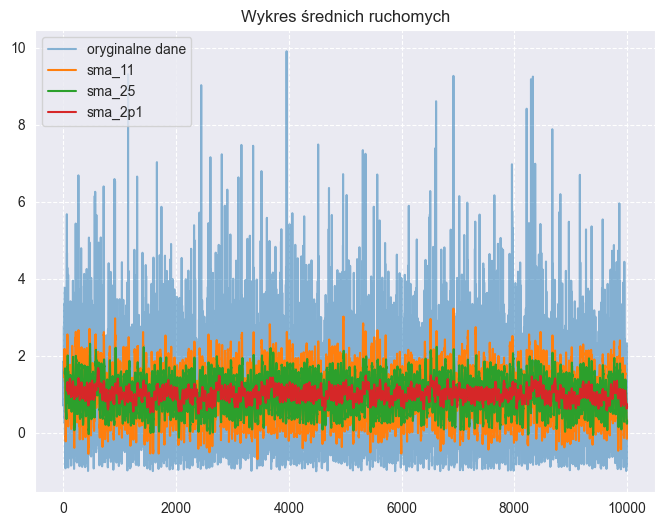

In [30]:
file_path2 = "dane\\zad2_lista1.txt"
data2 = np.loadtxt(file_path2)

def moving_average(data, window_size):
    p = (window_size - 1) // 2
    T = np.zeros(len(data) - window_size + 1)
    for i in range(len(T)):
        T[i] = 1/(2*p+1) * np.sum(data[i:i+2*p+1])
    return T

sma_11 = moving_average(data2, 11)
sma_25 = moving_average(data2, 25)
p = 30
sma_2p1 = moving_average(data2, 2*p+1)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(data2)), data2, label='oryginalne dane', alpha=0.5)
plt.plot(np.arange(11, len(data2)+1), sma_11, label='sma_11')
plt.plot(np.arange(25, len(data2)+1), sma_25, label='sma_25')
plt.plot(np.arange(2*p+1, len(data2)+1), sma_2p1, label='sma_2p1')
plt.title('Wykres średnich ruchomych')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# Zad3

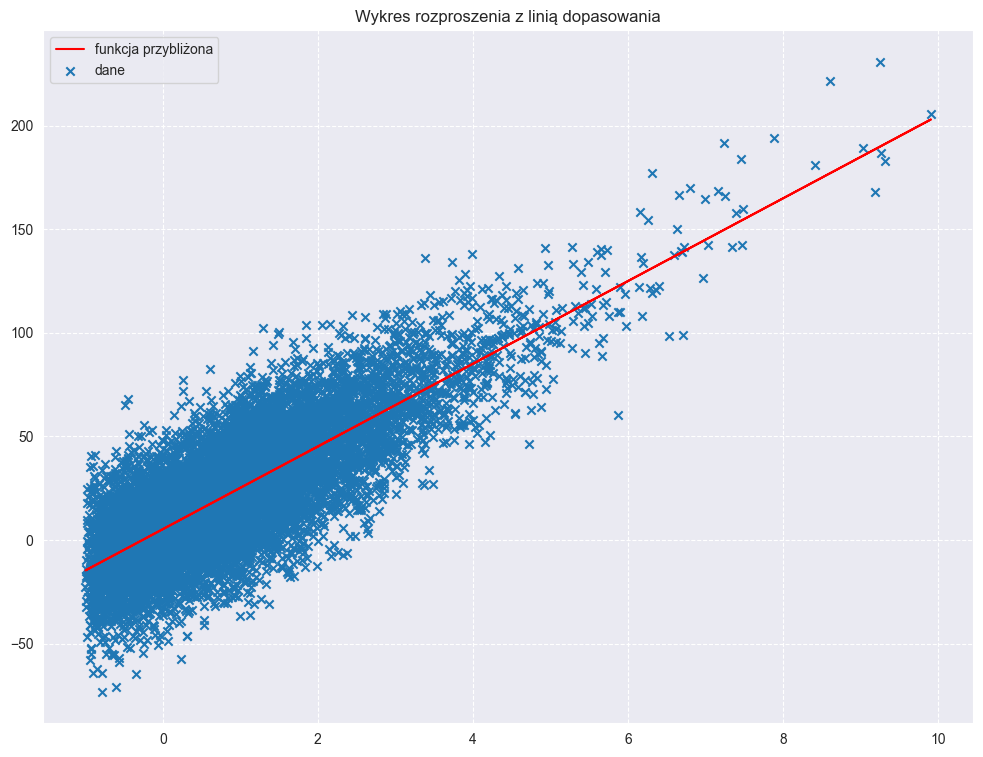

Wzór przybliżonej funkcji: y = 19.97x + 5.23


In [31]:
file_path3 = "dane\\zad3_lista1.txt"
data3 = np.loadtxt(file_path3)


def least_squares(data1, data2):
    x_mean = np.mean(data1)
    y_mean = np.mean(data2)
    b1 = np.sum((data1 - x_mean) * data2) / np.sum((data1 - x_mean) ** 2)
    b0 = y_mean - b1 * x_mean
    return b0, b1

b0, b1 = least_squares(data2, data3)

plt.figure(figsize=(12, 9))
plt.plot(data2, b0 + b1*data2, label='funkcja przybliżona', color='r')
plt.scatter(data2, data3, label='dane', marker='x')
plt.title('Wykres rozproszenia z linią dopasowania')
plt.grid(linestyle='--')
plt.legend()
plt.show()

print(f'Wzór przybliżonej funkcji: y = {round(b1,2)}x + {round(b0,2)}')

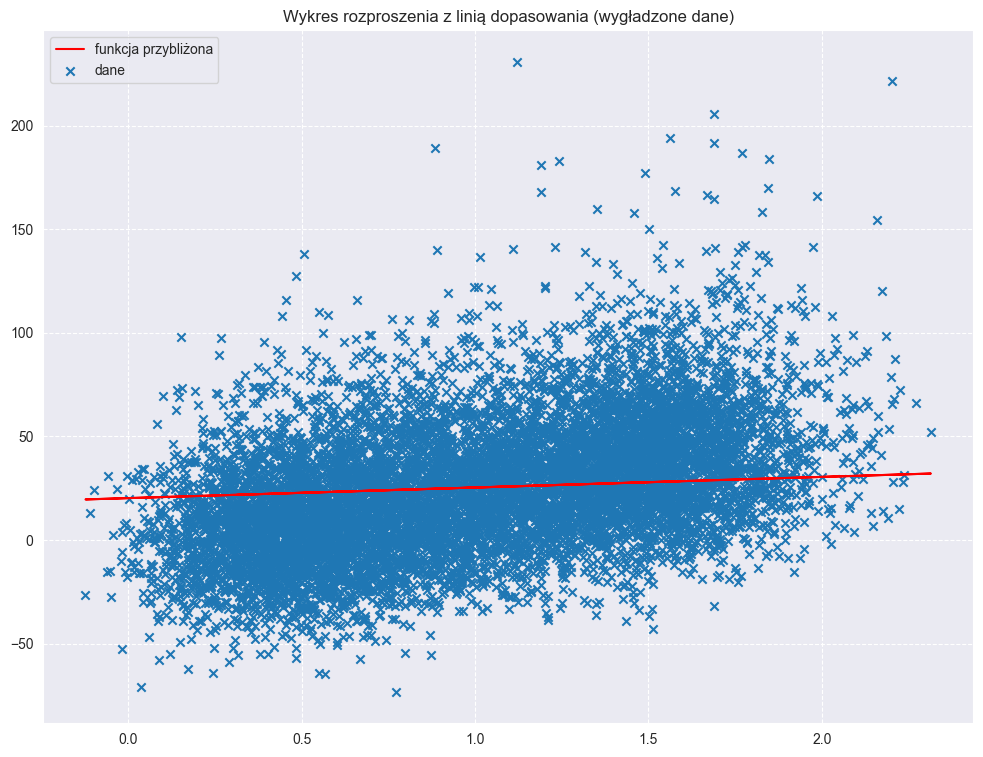

Wzór przybliżonej funkcji: y = 5.12x + 20.23


In [32]:
b0, b1 = least_squares(sma_25, data3[:len(sma_25)])
p = 12

plt.figure(figsize=(12, 9))
plt.plot(sma_25, b0 + b1*sma_25, label='funkcja przybliżona', color='r')
plt.scatter(sma_25, data3[p:len(data3)-p], label='dane', marker='x')
plt.title('Wykres rozproszenia z linią dopasowania (wygładzone dane)')
plt.grid(linestyle='--')
plt.legend()
plt.show()

print(f'Wzór przybliżonej funkcji: y = {round(b1,2)}x + {round(b0,2)}')

# Zad4

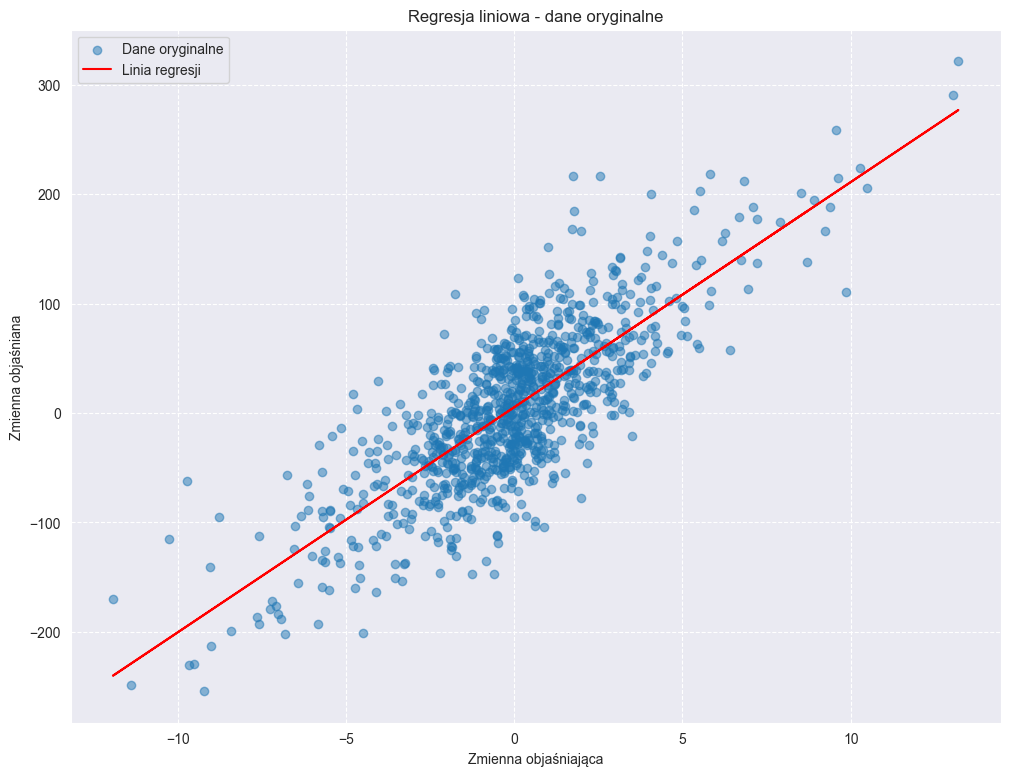

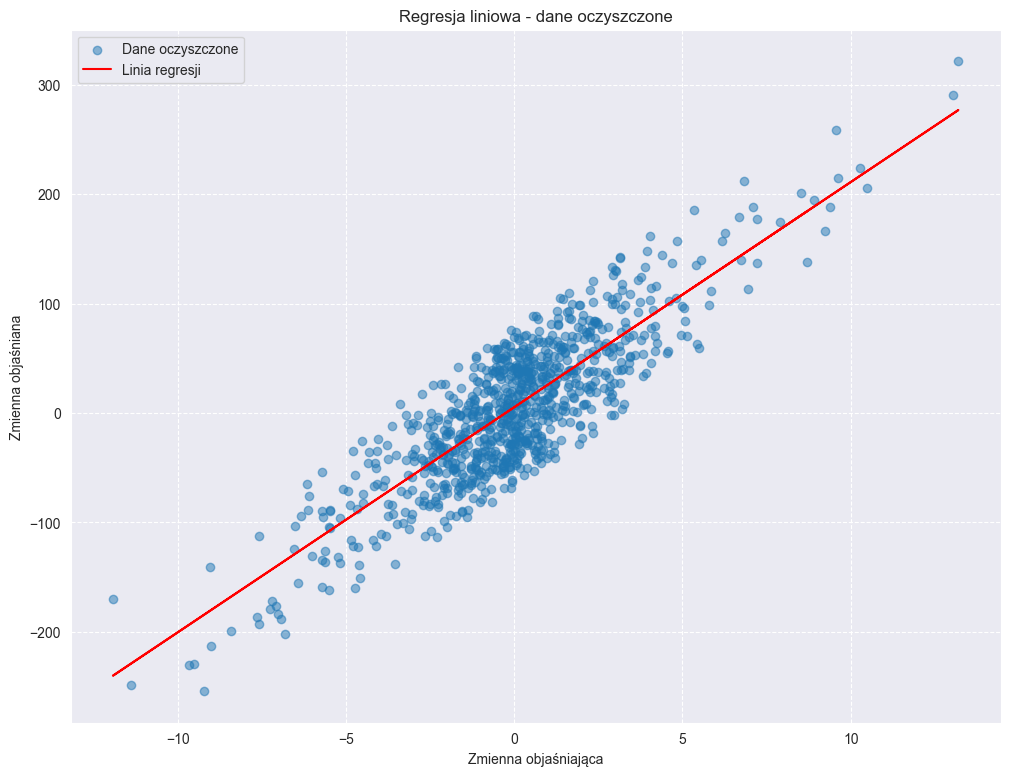

In [33]:
def delete_residuals(X, Y, residuals, threshold):
    X_clean = []
    Y_clean = []
    for i in range(len(residuals)):
        if residuals[i] < threshold:
            X_clean.append(X[i])
            Y_clean.append(Y[i])
    return np.array(X_clean), np.array(Y_clean)


file_path4 = "dane\\zad4_lista1.txt"
data4 = np.loadtxt(file_path4)

X = data4[:, 0]
Y = data4[:, 1]


b0, b1 = least_squares(X, Y)

residuals = abs(Y - (b0 + b1 * X)) #ale to jest de facto błąd bezwzględny

# Wykresy regresji
plt.figure(figsize=(12, 9))

# Oryginalna regresja z resztami
plt.scatter(X, Y, label="Dane oryginalne", alpha=0.5)
plt.plot(X, b0 + b1 * X, color='r', label=f'Linia regresji')
plt.title("Regresja liniowa - dane oryginalne")
plt.xlabel("Zmienna objaśniająca")
plt.ylabel("Zmienna objaśniana")
plt.grid(linestyle='--')
plt.legend()
plt.show()

# Usuwanie wartości odstających
X_clean, Y_clean = delete_residuals(X, Y, residuals, np.mean(residuals)*2)

# Wykres bez wartości odstających
plt.figure(figsize=(12, 9))
plt.scatter(X_clean, Y_clean, label="Dane oczyszczone", alpha=0.5)
plt.plot(X, b0 + b1 * X, color='r', label=f'Linia regresji')
plt.title("Regresja liniowa - dane oczyszczone")
plt.xlabel("Zmienna objaśniająca")
plt.ylabel("Zmienna objaśniana")
plt.grid(linestyle='--')
plt.legend()
plt.show()

# Zad5

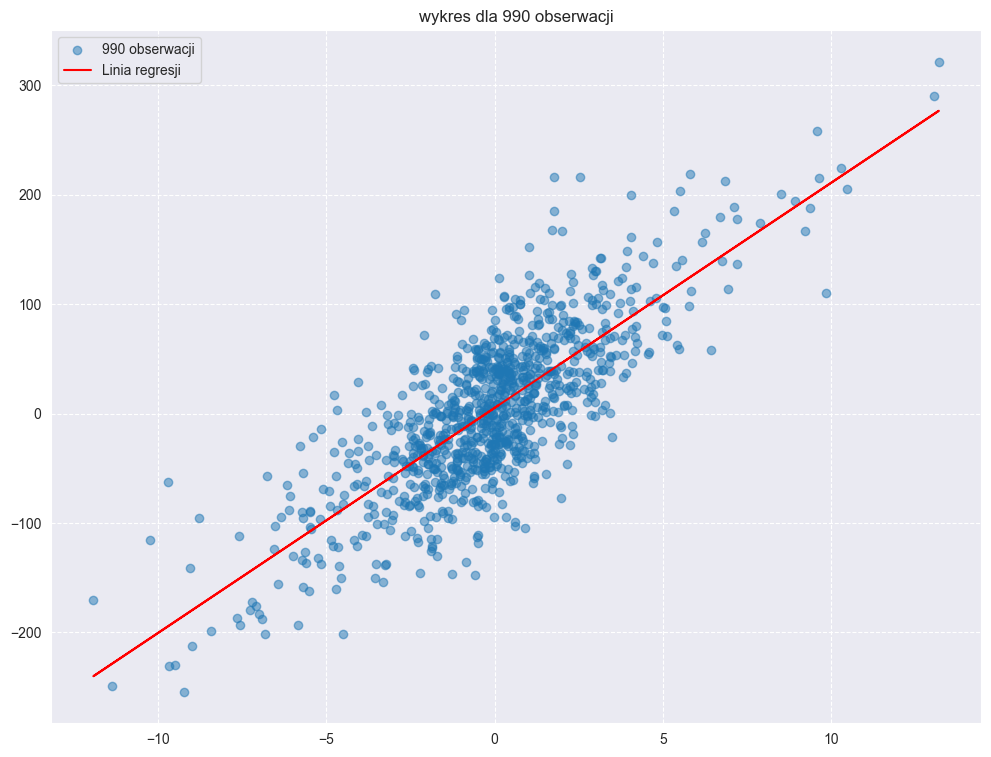

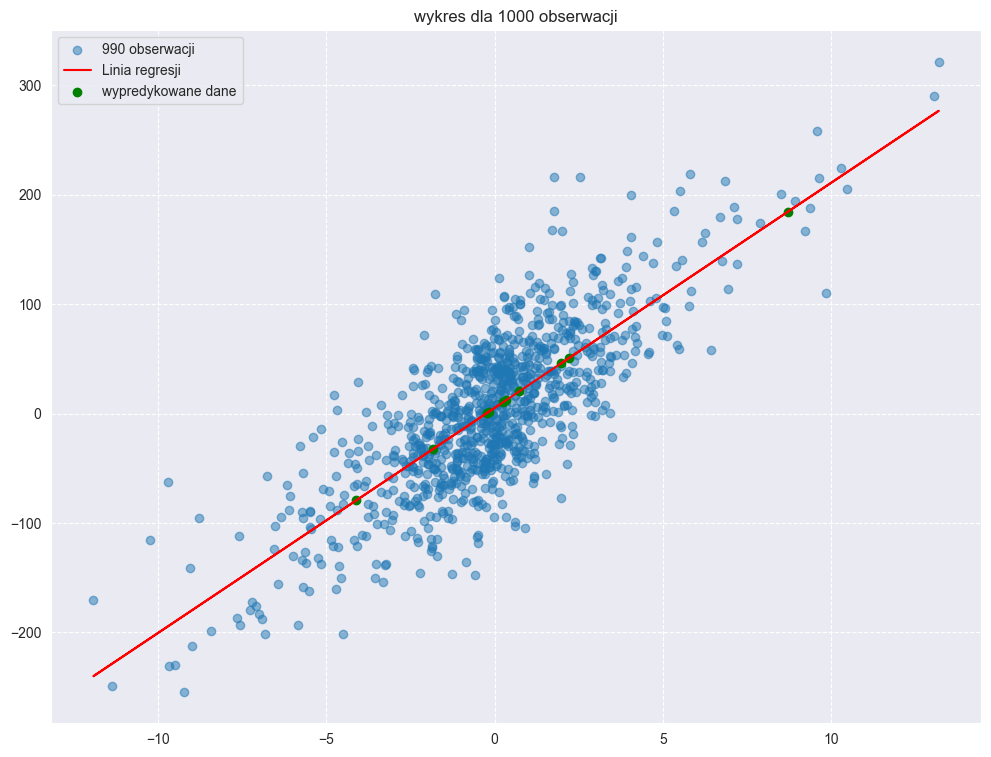

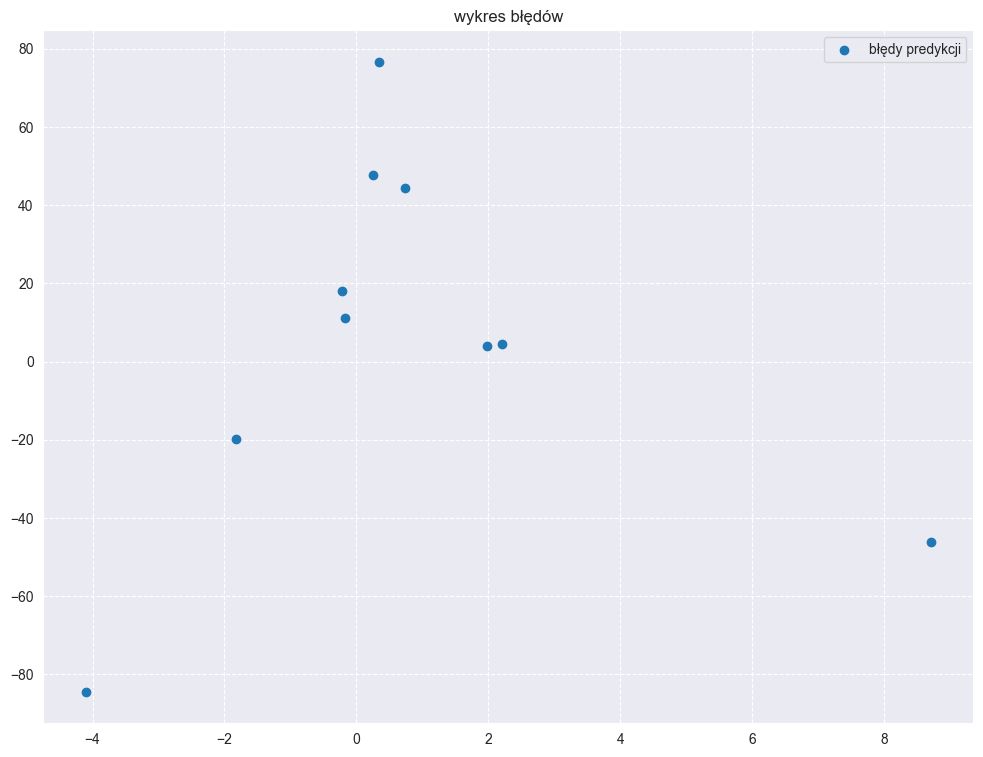

In [34]:
def predict_values(X, b0, b1):
    return b0 + b1 * X

X_whole = data4[:,0]
Y_whole = data4[:,1]
X = X_whole[:990]
Y = Y_whole[:990]
X_rest = X_whole[990:]
Y_rest = Y_whole[990:]

b0, b1 = least_squares(X, Y)
predicted_Y = predict_values(X_rest, b0, b1)

#wykres 990
plt.figure(figsize=(12,9))
plt.scatter(X, Y, label="990 obserwacji", alpha=0.5)
plt.plot(X, b0 + b1 * X, color='r', label=f'Linia regresji')
plt.grid(linestyle='--')
plt.title('wykres dla 990 obserwacji')
plt.legend(loc='best')
plt.show()

#wykres 1000
plt.figure(figsize=(12,9))
plt.scatter(X, Y, label="990 obserwacji", alpha=0.5)
plt.plot(X, b0 + b1 * X, color='r', label=f'Linia regresji')
plt.scatter(X_rest, predicted_Y, color='g', label='wypredykowane dane')
plt.grid(linestyle='--')
plt.title('wykres dla 1000 obserwacji')
plt.legend(loc='best')
plt.show()

#wykres błędów
plt.figure(figsize=(12,9))
plt.scatter(X_rest, Y_rest - predicted_Y, label='błędy predykcji')
plt.grid(linestyle='--')
plt.title('wykres błędów')
plt.legend(loc='best')
plt.show()

# Zad6

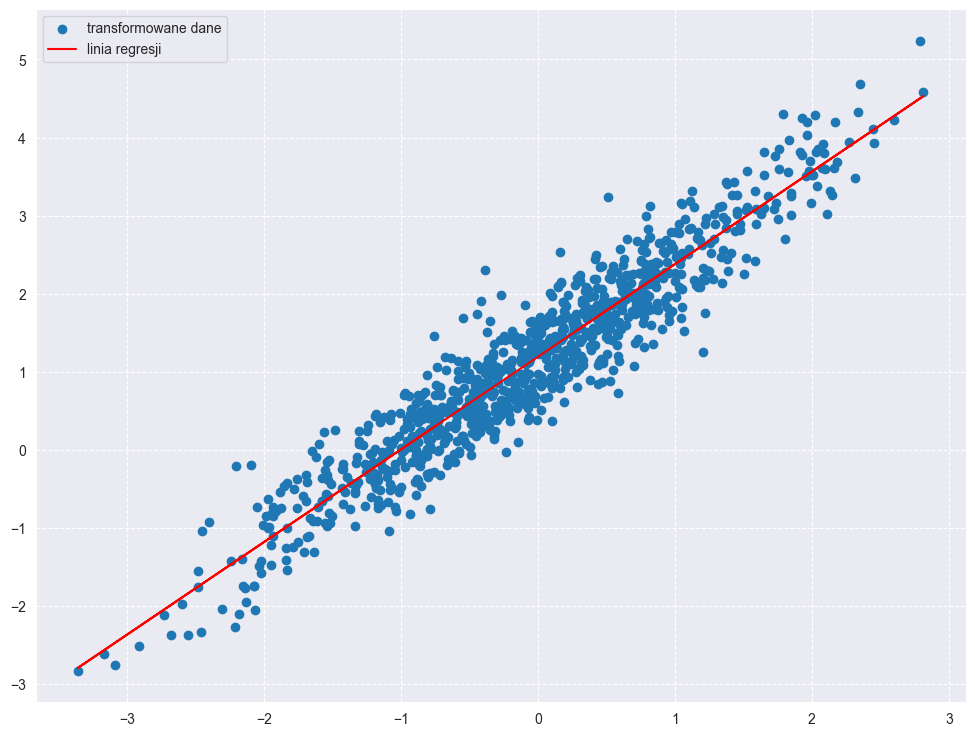

In [35]:
file_path6 = "dane\\zad6_lista1.txt"
data6 = np.loadtxt(file_path6)

X = data6[:, 0]
Y = data6[:, 1]

Y_transformed = np.log(Y)

b0, b1 = least_squares(X, Y_transformed)

plt.figure(figsize=(12,9))
plt.scatter(X, Y_transformed, label='transformowane dane')
plt.plot(X, b0 + X*b1, color='r', label='linia regresji')
plt.grid(linestyle='--')
plt.legend(loc='best')
plt.show()

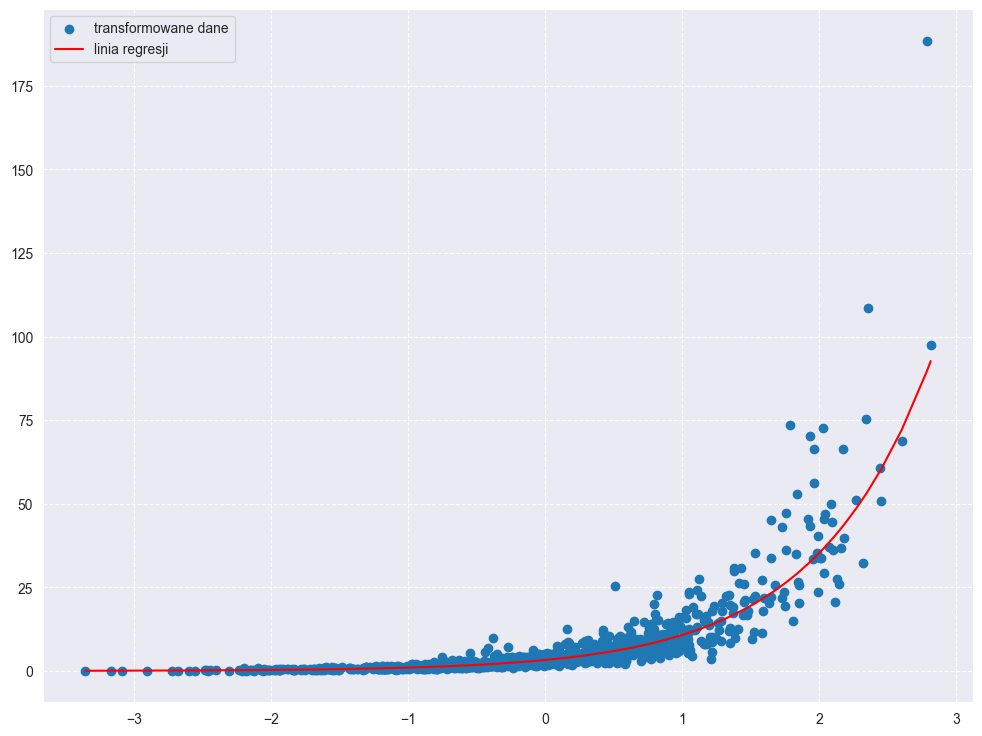

In [36]:
#funkcja odwrotna + oryginalne dane
Y_transformed2 = np.exp(b0 + b1*X)

plt.figure(figsize=(12,9))
plt.scatter(X, Y, label='transformowane dane')
plt.plot(sorted(X), sorted(Y_transformed2), color='r', label='linia regresji')
plt.grid(linestyle='--')
plt.legend(loc='best')
plt.show()
